In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#TODO include sig_end_tstamp, SIG_END_CAUSE_CODE, STREAM_DIRECTION
dates = [
'timestamp_date',
'create_tstamp'
]

cols_to_remove = [
'TIMESTAMP_DATE',
'CREATE_TSTAMP',
'CQM_STREAM_INFO_ID',
'CQM_STREAM_INFO_TAG_ID',
'sig_invite_tstamp',
'sig_accept_tstamp',
'sig_end_tstamp', #!
'create_tstamp_tag',
'inbound_early_media_start_tstamp',
'inbound_early_media_end_tstamp',
'inbound_media_start_tstamp',
'inbound_media_end_tstamp',
'inbound_s_jitter_max_int_1_tstamp',
'outbound_early_media_start_tstamp',
'outbound_early_media_end_tstamp',
'outbound_media_start_tstamp',
'outbound_media_end_tstamp',
'outbound_s_jitter_max_int_1_tstamp',
'outbound_s_jitter_max_int_2_tstamp',
'S3_FILE_NAME',
'RTT_GUESS',
'RELAY_VERSION',
'CREATE_PROGRAM_TAG',
'TAGGER_VERSION',
'DNIS',
'CALL_ID',
'CALLER_DID',
'CALLEE_DID',
'OUTBOUND_SENDER_UA',
'INBOUND_SENDER_UA',
'PROXY_HOSTNAME',
'RELAY_HOSTNAME',
'SIG_END_CAUSE_CODE', #!
'STREAM_DIRECTION', #!
'INBOUND_PHONE_NETWORK',
'OUTBOUND_PHONE_NETWORK',
'MOS_MINUS',
'MOS_PLUS',
'WAS_ON_HOLD',
'INBOUND_S_DTMF_COUNT',
'INBOUND_P_MOS',
'INBOUND_P_MOS_MINUS',
'INBOUND_P_MOS_PLUS',
'INBOUND_SENDER_ACCT',
'OUTBOUND_SENDER_ACCT',
'OUTBOUND_P_MOS',
'OUTBOUND_P_MOS_MINUS',
'OUTBOUND_P_MOS_PLUS',
'INBOUND_PHONE_NUMBER_COUNTRY_IS_POSSIBLE',
'INBOUND_PHONE_NUMBER_COUNTRY_IS_VALID',
'OUTBOUND_PHONE_NUMBER_COUNTRY_IS_POSSIBLE',
'OUTBOUND_PHONE_NUMBER_COUNTRY_IS_VALID'
]


df = pd.read_csv("datasets/full.csv", index_col=0)

#remove cols from list
df.drop(labels=[col.lower() for col in cols_to_remove], inplace=True, axis=1)
#remove cols that contain IP or PORT
df.drop(labels=[s for s in list(df) if "ip" in s or "port" in s], inplace=True, axis=1)

#remove cols that contain nunique data
nunique = df.apply(pd.Series.nunique)
df.drop(nunique[nunique == 1].index, axis=1, inplace=True)

#remove na's
df.dropna(axis=1, inplace=True)


df.sample(10)

/Users/thung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,87,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,interval_1_length,interval_2_length,mos,inbound_payload_type,inbound_packet_rate,inbound_s_early_media_pkts,inbound_s_total_pkts,inbound_s_lost_pkts,inbound_s_loss_pkts_avgrate,inbound_s_unauth_pkts,inbound_s_dup_count,inbound_s_ooo_count,inbound_s_burst_density,inbound_s_gap_density,inbound_s_burst_duration,inbound_s_gap_duration,inbound_s_loss_burst_factor,inbound_s_loss_graph_timescale,inbound_p_lost_pkts_total,inbound_p_burst_duration,inbound_p_gap_duration,inbound_p_rtt,inbound_p_rtcp_rr_count,inbound_p_rtcp_sr_count,inbound_p_rtcp_xrvm_count,inbound_s_invalid_pkts,inbound_s_pt_change_count,inbound_s_unknown_pt_count,outbound_payload_type,outbound_packet_rate,outbound_s_early_media_pkts,outbound_s_total_pkts,outbound_s_lost_pkts,outbound_s_loss_pkts_avgrate,outbound_s_unauth_pkts,outbound_s_dtmf_count,outbound_s_dup_count,outbound_s_ooo_count,outbound_s_burst_density,outbound_s_gap_density,outbound_s_burst_duration,outbound_s_gap_duration,outbound_s_loss_burst_factor,outbound_s_loss_graph_timescale,outbound_p_lost_pkts_total,outbound_p_burst_duration,outbound_p_gap_duration,outbound_p_rtt,outbound_p_rtcp_rr_count,outbound_p_rtcp_sr_count,outbound_p_rtcp_xrvm_count,outbound_s_invalid_pkts,outbound_s_pt_change_count,outbound_s_unknown_pt_count,inbound_natted,outbound_natted
5252,1,30,2.574754,0,50,943,645,0,0.0,0,0,1,0.000000,0.000000,0,12920,1.0,1.280000,0,0,0,0,0,3,0,0,0,0,0,50,959,637,0,0.000000,0,0,0,1,0.0000,0.000000,0,12760,1.00,1.280000,0,0,0,0,0,3,3,0,0,0,1,0
6037,1,30,1.000000,0,50,0,7396,0,0.0,0,0,2,0.000000,0.000000,0,16868,1.0,2.560000,0,65535,65535,125,0,29,29,0,0,0,0,50,0,7366,4,0.000000,0,13,0,6,12.5000,0.000000,320,8014,1.00,2.560000,262144,0,0,0,0,31,0,0,0,0,0,1
1089,1,30,1.000000,0,50,72,7057,0,0.0,0,0,9,0.000000,0.000000,0,10088,1.0,2.560000,0,0,0,0,0,30,0,0,0,0,0,50,77,6968,91,1.171875,0,0,0,87,23.4375,0.390625,238,6489,1.05,2.560000,4980739,0,0,0,0,27,0,0,0,0,1,0
1286,1,30,2.768019,0,50,0,3013,0,0.0,0,0,1,0.000000,0.000000,0,60280,1.0,1.280000,0,0,0,0,0,12,12,0,0,0,0,50,0,3021,0,0.000000,0,0,0,1,0.0000,0.000000,0,60440,1.00,1.280000,0,0,0,0,0,13,0,0,0,0,0,1
8199,1,30,4.408359,0,50,168,8628,0,0.0,0,0,2,0.000000,0.000000,0,41508,1.0,5.120000,0,0,0,0,0,35,0,0,0,0,0,50,178,8643,0,0.000000,0,0,0,1,0.0000,0.000000,0,41808,1.00,5.120000,0,0,0,0,0,172,0,0,0,0,1,0
7306,1,45,2.557551,114,33,342,634,0,0.0,0,0,1,0.000000,0.000000,0,19050,1.0,1.939394,0,0,0,0,0,5,0,0,0,0,114,33,360,647,0,0.000000,0,0,0,1,0.0000,0.000000,0,19440,1.00,1.939394,0,0,0,337,0,4,4,0,0,0,1,0
2885,1,30,1.000000,0,50,0,106674,78,0.0,0,0,33,68.359375,0.390625,332,27886,1.1,40.960000,3145758,0,0,0,0,428,0,0,0,0,0,50,0,106763,0,0.000000,0,0,0,2,0.0000,0.390625,0,38128,1.00,40.960000,1,0,0,0,0,426,426,0,0,0,1,0
4801,1,30,4.408359,0,50,0,1702,0,0.0,0,0,1,0.000000,0.000000,0,34060,1.0,1.280000,0,0,0,0,0,6,0,0,0,0,0,50,0,1685,0,0.000000,0,0,0,1,0.0000,0.000000,0,33720,1.00,1.280000,0,0,0,0,0,8,0,0,0,0,0,1
6362,1,30,4.408359,0,50,73,503,0,0.0,0,0,1,0.000000,0.390625,0,10080,1.0,1.280000,0,0,0,0,0,3,0,0,0,503,0,50,75,503,0,0.000000,0,0,0,1,0.0000,0.390625,0,10080,1.00,1.280000,0,0,0,0,1,1,0,0,0,503,0,0
8609,1,30,2.570240,0,50,1195,252,0,0.0,0,0,1,0.000000,0.390625,0,5060,1.0,1.280000,0,0,0,0,0,2,0,0,0,0,0,50,1234,259,0,0.000000,0,0,0,1,0.0000,0.000000,0,5200,1.00,1.280000,0,0,0,0,0,1,1,0,0,0,1,0


In [35]:
#round MOS to int
df['mos'] = df['mos'].astype(int)

In [60]:
df.shape

(40000, 56)

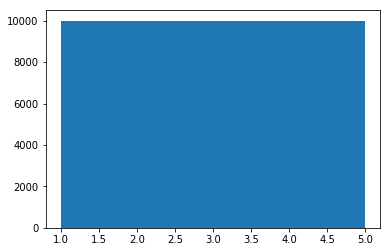

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt
bins = [1, 2, 3, 4, 5]
plt.hist(df.mos, bins=bins)
plt.show()

#convert to int
# df = pd.get_dummies(df, columns=['SIG_END_CAUSE_CODE'])
# df = pd.get_dummies(df, columns=['STREAM_DIRECTION'])
# df = pd.get_dummies(df, columns=['INBOUND_PHONE_NETWORK'])
# df = pd.get_dummies(df, columns=['OUTBOUND_PHONE_NETWORK'])


# objs = ['SIG_END_CAUSE_CODE',
#         'STREAM_DIRECTION',
#         'INBOUND_PHONE_NETWORK',
#         'OUTBOUND_PHONE_NETWORK'
#        ]

# [print(df[obj].unique()) for obj in objs]

In [37]:
from sklearn.preprocessing import StandardScaler
features = df.columns
target = 'mos'
# df = df.drop(labels=['mos'], axis=1)


# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,[target]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(x)

principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
# # reduced_data_df.head()
# finalDf = pd.concat([principalDf, pd.Series(df.mos)], axis = 1)
# # len(principalDf)
# # len(df.mos)
mos = df.mos
mos.reset_index(drop=True, inplace=True)
# mos

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.5590833333333334


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
score = rfc.score(x_test, y_test)
print(score)

0.8171666666666667


In [49]:
names = df.columns.values
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))


Features sorted by their score:
[(0.0926, 'inbound_s_loss_graph_timescale'), (0.0895, 'outbound_s_loss_graph_timescale'), (0.0738, 'outbound_p_gap_duration'), (0.056, 'inbound_p_gap_duration'), (0.0359, 'outbound_s_early_media_pkts'), (0.0356, 'outbound_s_dup_count'), (0.0354, 'inbound_s_early_media_pkts'), (0.0352, 'inbound_s_lost_pkts'), (0.0334, 'outbound_s_burst_duration'), (0.0334, 'inbound_s_burst_duration'), (0.0285, 'inbound_s_total_pkts'), (0.0278, 'inbound_s_dup_count'), (0.0252, 'outbound_p_rtcp_rr_count'), (0.0251, 'outbound_s_lost_pkts'), (0.0223, 'inbound_s_gap_density'), (0.0222, 'outbound_p_rtcp_sr_count'), (0.0219, 'inbound_p_rtcp_rr_count'), (0.021, 'inbound_s_gap_duration'), (0.0201, 'outbound_s_total_pkts'), (0.0199, 'outbound_packet_rate'), (0.019, 'inbound_p_rtcp_sr_count'), (0.0184, 'inbound_packet_rate'), (0.016, 'outbound_p_lost_pkts_total'), (0.0151, 'outbound_s_gap_duration'), (0.0142, 'outbound_s_gap_density'), (0.0141, 'outbound_p_burst_duration'), (0.014, 

In [58]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=42))
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)
y_score

array([[  2.67244869,   5.03703031,  -7.74545668, -99.33368945],
       [ -2.3363277 ,   4.30806271,  -5.29665225,  -4.07860683],
       [  1.60731822,  14.99111993, -13.84107389,  -3.15150886],
       ...,
       [ -1.49352872,   9.58607669,  -5.85295381,  -1.33747643],
       [ -1.01247282,  -0.65606233,  -2.12814715,  -1.09271842],
       [ 38.06085887,  -7.12409554, -61.49406306, -88.99018125]])

[[1078  625  277  510]
 [ 271  929  621  703]
 [ 171  598 1384  356]
 [  93   74  168 2142]]


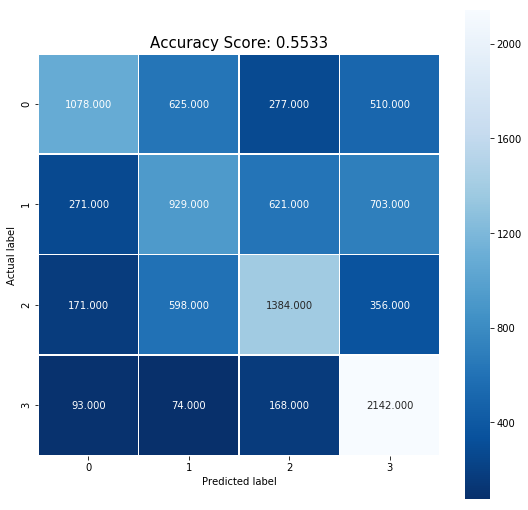

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
predictions = logisticRegr.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


[[2039  345   54   52]
 [ 236 1881  251  156]
 [  33  360 1996  120]
 [  46   69  128 2234]]


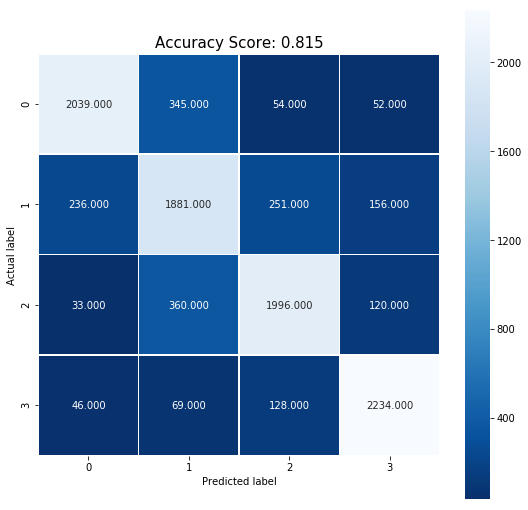

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
predictions = rfc.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

